In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely

In [23]:
from osgeo import ogr

In [81]:
list1 = []
ds = ogr.Open('1kml.kml')

for lyr in ds:
    for feat in lyr:
        geom = feat.GetGeometryRef()
        if geom != None:
            for i in range(0, geom.GetPointCount()):
                list1.append(geom.GetPoint(i))
list_kml = pd.DataFrame(list1, columns = ['lon','lat','no'])
list_kml

,lon,lat,no
0,36.035194,52.968086,0.0
1,36.046593,52.972942,0.0
2,36.053452,52.971169,0.0
3,36.055473,52.970219,0.0
4,36.064686,52.959949,0.0
5,36.066639,52.959980,0.0
6,36.071560,52.959267,0.0
7,36.073906,52.954361,0.0
8,36.074875,52.952015,0.0
9,36.076839,52.950420,0.0


In [82]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(list_kml.lon, list_kml.lat)]
list_kml = list_kml.drop(['lon', 'lat','no'], axis=1)
gdf = gpd.GeoDataFrame(list_kml, geometry=geometry)
gdf

,geometry
0,POINT (36.03519439697266 52.96808624267578)
1,POINT (36.04659271240234 52.97294235229492)
2,POINT (36.05345153808594 52.97116851806641)
3,POINT (36.05547332763672 52.97021865844727)
4,POINT (36.0646858215332 52.9599494934082)
5,POINT (36.0666389465332 52.95998001098633)
6,POINT (36.07155990600586 52.95926666259766)
7,POINT (36.07390594482422 52.95436096191406)
8,POINT (36.07487487792969 52.9520149230957)
9,POINT (36.07683944702148 52.95042037963867)


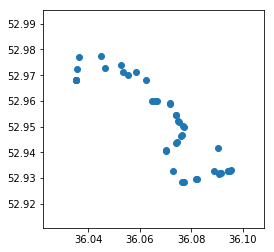

In [83]:
gdf.plot()

In [84]:
gdf.to_file('stops_trek.shp')

In [127]:
import kml2geojson
import json
from shapely.geometry import Point

In [130]:
kml2geojson.main.convert('1kml.kml','C:\\Users\\poletaev_im\\nearest_stop_id_from_kml\\' , separate_folders=True)
stops_kml = gpd.read_file('Маркеры.geojson', layer = 0)
with open('Маршруты.geojson') as f:
    data = json.load(f,  parse_int=True)
coo =  pd.DataFrame(data['features'][1]['geometry']['coordinates'], columns = ['lon', 'lat','no'])
times = pd.DataFrame(data['features'][1]['properties']['times'], columns = ['times'])
geometry = [Point(xy) for xy in zip(coo.lon, coo.lat)]
coo = coo.drop(['lon', 'lat'], axis=1)
coord = gpd.GeoDataFrame(coo, geometry=geometry)
coord = coord.join(times)
inters = gpd.sjoin(stops_kml, coord, how = 'left', op = 'intersects')
inters = inters.drop(['styleUrl', 'color','index_right'], axis=1)
inters

C:\Users\poletaev_im\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,name,geometry,no,times
0,Веселая Слобода,POINT (36.03519439697266 52.96808624267578),173.0,2018-12-01T09:31:26.000Z
1,Стадион им. Ленина,POINT (36.04659271240234 52.97294235229492),180.0,2018-12-01T09:34:40.000Z
2,ТЦ Тургеневский,POINT (36.05345153808594 52.97116851806641),171.0,2018-12-01T09:36:24.000Z
3,Атолл,POINT (36.05547332763672 52.97021865844727),185.0,2018-12-01T09:38:30.000Z
4,1-я Посадская ул-ца,POINT (36.0646858215332 52.9599494934082),154.0,2018-12-01T09:43:17.000Z
5,1-я Посадская улица,POINT (36.0666389465332 52.95998001098633),159.0,2018-12-01T09:44:49.000Z
6,Школа 26,POINT (36.07155990600586 52.95926666259766),156.0,2018-12-01T09:49:00.000Z
7,Супермаркет Апельсин,POINT (36.07390594482422 52.95436096191406),157.0,2018-12-01T09:50:44.000Z
8,Песковская,POINT (36.07487487792969 52.9520149230957),154.0,2018-12-01T09:51:13.000Z
9,Городская улица,POINT (36.07683944702148 52.95042037963867),152.0,2018-12-01T09:51:31.000Z


In [ ]:
inters.to_csv('inters.csv', sep=';', index=False, encoding='cp1251')

In [32]:
from osgeo import gdal, ogr
srcDS = gdal.OpenEx('1kml.kml')
ds = gdal.VectorTranslate('temp_file.json', srcDS, format='GeoJSON')

In [33]:
kml_file1 = gpd.read_file('temp_file.json', layer = 0)
kml_file1

,Name,Description,geometry
0,Веселая Слобода,,POINT (36.03519439697266 52.96808624267578)
1,Стадион им. Ленина,,POINT (36.04659271240234 52.97294235229492)
2,ТЦ Тургеневский,,POINT (36.05345153808594 52.97116851806641)
3,Атолл,,POINT (36.05547332763672 52.97021865844727)
4,1-я Посадская ул-ца,,POINT (36.0646858215332 52.9599494934082)
5,1-я Посадская улица,,POINT (36.0666389465332 52.95998001098633)
6,Школа 26,,POINT (36.07155990600586 52.95926666259766)
7,Супермаркет Апельсин,,POINT (36.07390594482422 52.95436096191406)
8,Песковская,,POINT (36.07487487792969 52.9520149230957)
9,Городская улица,,POINT (36.07683944702148 52.95042037963867)


In [114]:
kml_file.crs = {"init": "EPSG:4326"}
kml_file=kml_file.to_crs({"init": "EPSG:32637"})
buf = kml_file.buffer(10)
kml_file_buf = gpd.GeoDataFrame()
kml_file_buf['geometry'] = buf
kml_file_buf = kml_file_buf.join(kml_file['Name'])
kml_file_buf

,geometry,Name
0,"POLYGON ((300918.4686263505 5872834.074238224,...",Веселая Слобода
1,"POLYGON ((301705.9390358785 5873342.498850845,...",Стадион им. Ленина
2,"POLYGON ((302158.2518895262 5873126.304889604,...",ТЦ Тургеневский
3,"POLYGON ((302289.6387019955 5873015.104376339,...",Атолл
4,"POLYGON ((302861.3525196123 5871847.806238497,...",1-я Посадская ул-ца
5,"POLYGON ((302992.6403695853 5871845.833793542,...",1-я Посадская улица
6,"POLYGON ((303319.8354524383 5871753.004589067,...",Школа 26
7,"POLYGON ((303455.1142655766 5871201.054778134,...",Супермаркет Апельсин
8,"POLYGON ((303509.5454156982 5870937.51823417, ...",Песковская
9,"POLYGON ((303634.261008987 5870754.823964733, ...",Городская улица


In [131]:
stops = gpd.read_file('Остановки.shp', encoding='utf-8')
stops.crs = {"init": "EPSG:4326"}
stops=stops.to_crs({"init": "EPSG:32637"})
buf_st = stops.buffer(10)
buf_stops = gpd.GeoDataFrame()
buf_stops['geometry'] = buf_st


In [132]:
buf_stops = buf_stops.join(stops['STOP_ID'])
buf_stops = buf_stops.join(stops['STOP_NAME'])
buf_stops

,geometry,STOP_ID,STOP_NAME
0,"POLYGON ((305228.6411127239 5870803.679376229,...",458,По требованию
1,"POLYGON ((299606.3635132653 5868391.141971168,...",459,Кромская улица
2,"POLYGON ((302704.3400891518 5873607.979687557,...",460,Кромская улица
3,"POLYGON ((310306.8247210591 5878541.820481744,...",1,Медведевский лес
4,"POLYGON ((310419.2812585158 5878542.729230627,...",2,Посёлок Булгаковский
5,"POLYGON ((309570.2267793521 5877778.60089649, ...",3,Торгово-развлекательный центр РИО
6,"POLYGON ((310474.844850178 5870399.224906746, ...",4,Зона отдыха
7,"POLYGON ((310499.5923387269 5870380.20873535, ...",5,Зона отдыха
8,"POLYGON ((310593.1885628861 5872209.443024664,...",6,362-й километр
9,"POLYGON ((310546.8241399043 5872153.907987373,...",7,362-й километр


In [135]:
inters = gpd.sjoin(kml_file_buf, buf_stops,  how = 'left', op = 'intersects').reset_index()
inters

,index,geometry,Name,index_right,STOP_ID,STOP_NAME
0,0,"POLYGON ((300918.4686263505 5872834.074238224,...",Веселая Слобода,453.0,451.0,Часовая улица
1,1,"POLYGON ((301705.9390358785 5873342.498850845,...",Стадион им. Ленина,NaN,NaN,NaN
2,2,"POLYGON ((302158.2518895262 5873126.304889604,...",ТЦ Тургеневский,NaN,NaN,NaN
3,3,"POLYGON ((302289.6387019955 5873015.104376339,...",Атолл,NaN,NaN,NaN
4,4,"POLYGON ((302861.3525196123 5871847.806238497,...",1-я Посадская ул-ца,426.0,424.0,1-я Посадская улица
5,5,"POLYGON ((302992.6403695853 5871845.833793542,...",1-я Посадская улица,NaN,NaN,NaN
6,6,"POLYGON ((303319.8354524383 5871753.004589067,...",Школа 26,136.0,134.0,Школа № 26
7,7,"POLYGON ((303455.1142655766 5871201.054778134,...",Супермаркет Апельсин,139.0,137.0,Улица Нормандия-Неман
8,7,"POLYGON ((303455.1142655766 5871201.054778134,...",Супермаркет Апельсин,129.0,127.0,Улица Нормандия-Неман
9,8,"POLYGON ((303509.5454156982 5870937.51823417, ...",Песковская,NaN,NaN,NaN


In [134]:
kml_file_buf.to_file('kml_file_buf.shp', encoding='utf-8')
buf_stops.to_file('buf_stops.shp', encoding='utf-8')